In [1]:
import utils.data as data

# Loading samples and analyzing them

In [2]:
dataset = data.MultiViewTemporalDataset(mode = "validation", apply_mask=True)

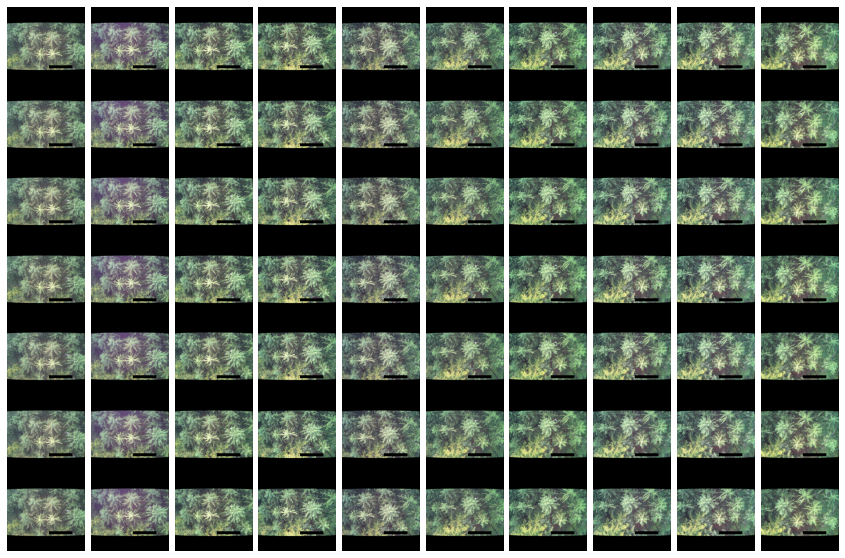

In [3]:
dataset[0].show_photo_grid()

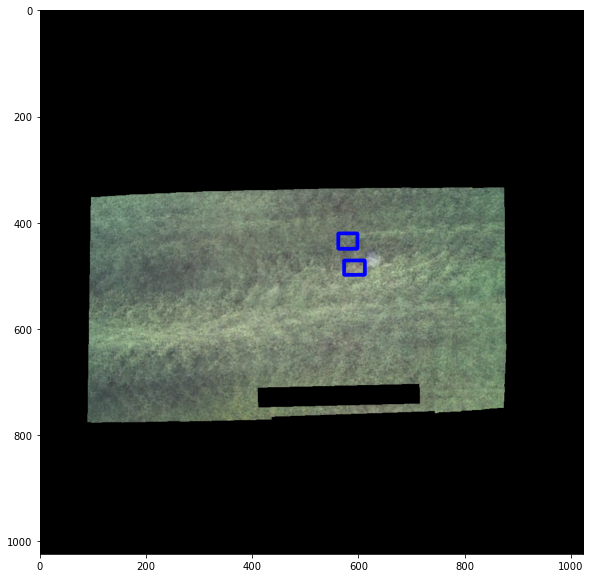

In [3]:
dataset[8].draw_labels(dataset[8].labels, on_integrated=True)